<a href="https://colab.research.google.com/github/JyothikaKanchu/Breastcancer/blob/main/breastcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input director


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from pathlib import Path

import glob
import random
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset  # Ensure Dataset is imported
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim
import cv2
from matplotlib.image import imread

import tensorflow as tf
#from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import glob
import PIL
import random

random.seed(100)

Num GPUs Available:  0


In [ ]:
breast_img_paths = glob.glob('/content/drive/MyDrive/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/**/*.png', recursive = True)
for img_path in breast_img_paths[:5]:
    print(img_path)

/content/drive/MyDrive/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/400X/SOB_B_F-14-9133-400-012.png
/content/drive/MyDrive/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/400X/SOB_B_F-14-9133-400-017.png
/content/drive/MyDrive/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/400X/SOB_B_F-14-9133-400-021.png
/content/drive/MyDrive/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/400X/SOB_B_F-14-9133-400-025.png
/content/drive/MyDrive/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/400X/SOB_B_F-14-9133-400-007.png


In [ ]:
# types of cancer
benign = []
malignant = []
# subtypes
A, F, PT, TA = [], [], [], [] # subtypes for benign
DC, LC, MC, PC = [], [], [], [] # subtypes for malignant

for img in breast_img_paths:
    img_name = Path(img).name
    if img_name[6] == 'A':
        A.append(img)
    elif img_name[6] == 'F':
        F.append(img)
    elif img_name[6] == 'P'and img_name[7] == 'T':
        PT.append(img)
    elif img_name[6] == 'T':
        TA.append(img)
    elif img_name[6] == 'D':
        DC.append(img)
    elif img_name[6] == 'L':
        LC.append(img)
    elif img_name[6] == 'M':
        MC.append(img)
    elif img_name[6] == 'P':
        PC.append(img)

    if img_name[4] == 'B':
        benign.append(img)
    else:
        malignant.append(img)

In [ ]:
print("Total examples: ", len(breast_img_paths))
print("Number of benign examples", len(benign))
print("Number of malignant examples", len(malignant))

Total examples:  7909
Number of benign examples 2480
Number of malignant examples 5429


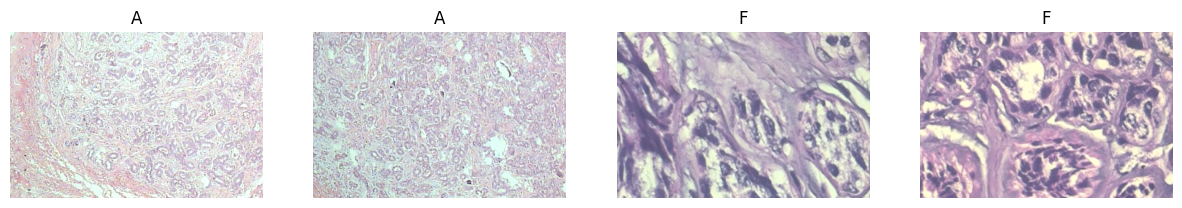

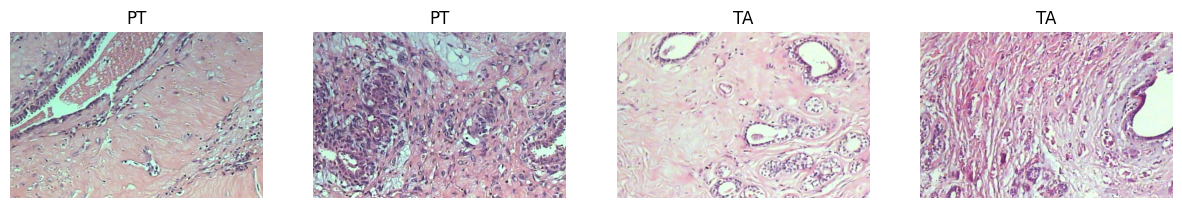

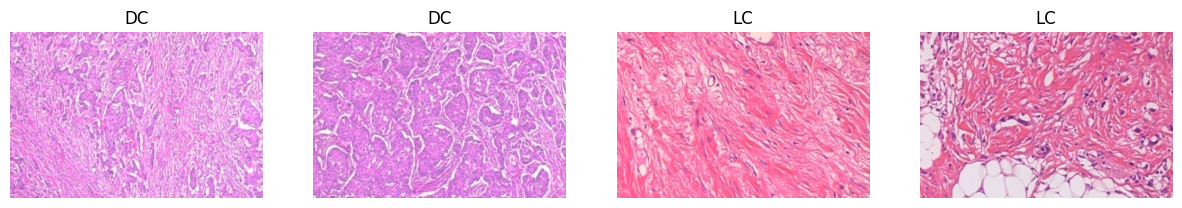

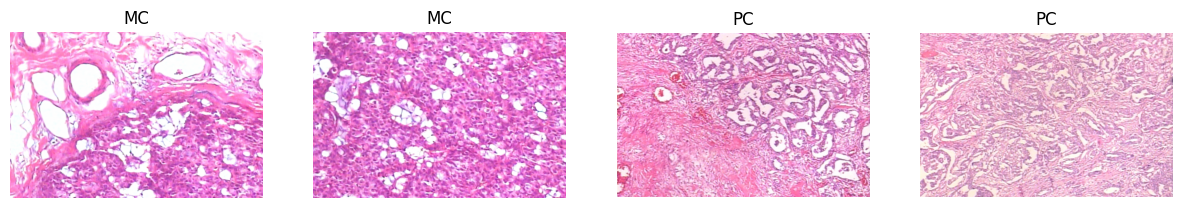

In [ ]:
import matplotlib.image as mpimg

def display_images(label1, label2, list1, list2):
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    for ax, img_path in zip(axes[:2], list1[:2]):
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.set_title(label1)
        ax.axis('off')

    for ax, img_path in zip(axes[2:], list2[:2]):
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.set_title(label2)
        ax.axis('off')
    plt.show()

# Display images from each list
display_images("A", "F", A, F)
display_images("PT","TA", PT, TA)
display_images("DC","LC", DC, LC)
display_images("MC","PC", MC, PC)

In [ ]:

def load_and_resize_images(img_list, label, size=(128, 128)):
    img_array = []
    for img in img_list:
        image = cv2.imread(img, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = tf.convert_to_tensor(image, dtype=tf.float32)
        image = image / 255.0
        if label != 4:
            augmented_images = augment_image(image)
            for aug_img in augmented_images:
                image_resized = tf.image.resize(aug_img, size)
                img_array.append([image_resized, label])
        else:
            image_resized = tf.image.resize(image, size)
            img_array.append([image_resized, label])

    return img_array

def augment_image(img):
    augmented_images = []

    augmented_images.append(img)

    for k in [1, 2]:
        rotated_img = tf.image.rot90(img, k=k)
        mirrored_rotated_img = tf.image.flip_left_right(rotated_img)
        augmented_images.append(mirrored_rotated_img)

    return augmented_images

A_imgs  = load_and_resize_images(A, 0)
F_imgs  = load_and_resize_images(F, 1)
PT_imgs  = load_and_resize_images(PT, 2)
TA_imgs = load_and_resize_images(TA, 3)
DC_imgs = load_and_resize_images(DC, 4)
LC_imgs = load_and_resize_images(LC, 5)
MC_imgs = load_and_resize_images(MC, 6)
PC_imgs = load_and_resize_images(PC, 7)


In [ ]:
data_b = A_imgs + F_imgs + PT_imgs + TA_imgs
data_m = DC_imgs + LC_imgs + MC_imgs + PC_imgs
print("Total number of benign examples:", len(data_b))
print("Total number of malignant examples:", len(data_m))

random.shuffle(data_b)
random.shuffle(data_m)

# Initial split to separate out the test set (20% of the data)
dataTrain_b, dataTest_b = train_test_split(data_b, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets (75% train, 25% val of 80% train-val data)
dataTrain_b, dataVal_b = train_test_split(dataTrain_b, test_size=0.25, random_state=42)

# Initial split to separate out the test set (20% of the data)
dataTrain_m, dataTest_m = train_test_split(data_m, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets (75% train, 25% val of 80% train-val data)
dataTrain_m, dataVal_m = train_test_split(dataTrain_m, test_size=0.25, random_state=42)

dataTrain_b_modified = [(image, 0) for image, label in dataTrain_b]
dataTrain_m_modified = [(image, 1) for image, label in dataTrain_m]

dataTrain = dataTrain_b_modified + dataTrain_m_modified
random.shuffle(dataTrain)

dataVal_b_modified = [(image, 0) for image, label in dataVal_b]
dataVal_m_modified = [(image, 1) for image, label in dataVal_m]

dataVal = dataVal_b_modified + dataVal_m_modified
random.shuffle(dataVal)

dataTest_b_modified = [(image, 0) for image, label in dataTest_b]
dataTest_m_modified = [(image, 1) for image, label in dataTest_m]

dataTest = dataTest_b_modified + dataTest_m_modified

print("Total number of examples:", len(dataTrain) + len(dataVal) + len(dataTest))

Total number of benign examples: 7440
Total number of malignant examples: 9385
Total number of examples: 16825


In [ ]:
def create_tf_dataset(img_list, batch_size=64):
    images, labels = zip(*img_list)
    images = np.array(images)  # Convert images to numpy array
    labels = np.array(labels)

    # One-hot encode labels
    labels = tf.keras.utils.to_categorical(labels, num_classes=2)

    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    dataset = dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

    return dataset

with tf.device('/GPU:0'):
    train_dataset = create_tf_dataset(dataTrain)
    val_dataset = create_tf_dataset(dataVal)
    test_dataset = create_tf_dataset(dataTest)

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout, Lambda, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
base_model = tf.keras.applications.DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(128, 128, 3)
)
# base_model.trainable = False
# Extract intermediate layers
layer_names = ['conv3_block12_concat', 'conv4_block24_concat', 'conv5_block16_concat']
intermediate_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create a new model that outputs intermediate layers
intermediate_model = Model(inputs=base_model.input, outputs=intermediate_outputs)

# Define the branches for each intermediate output
branch_outputs = []
for output in intermediate_outputs:
    x = GlobalAveragePooling2D()(output)
    x = Lambda(lambda x: tf.math.l2_normalize(x, axis=-1))(x)
    x = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    branch_outputs.append(x)
# Concatenate the branch outputs for score-level fusion
fusion = tf.keras.layers.Concatenate()(branch_outputs)

# Final dense layers
x = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(fusion)
x = BatchNormalization()(x)
x = Dropout(0.45)(x)
final_output = Dense(2, activation='softmax')(x)

# Combine everything into a model
binary_model = Model(inputs=base_model.input, outputs=final_output)

optimizer = Adam(learning_rate=0.0001)

binary_model.compile(optimizer=optimizer,
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Callbacks for early stopping and learning rate scheduling
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import time

start_time = time.time()

history = binary_model.fit(train_dataset,
                           validation_data=val_dataset,
                           epochs=50,
                           callbacks=[early_stopping, reduce_lr])

end_time = time.time()

total_time = end_time - start_time
print(f"Total time taken to train the model: {total_time:.2f} seconds")

Epoch 1/50
107/158 ━━━━━━━━━━━━━━━━━━━━ 13:45 16s/step - accuracy: 0.7174 - loss: 0.9908

In [ ]:
test_loss, test_acc = binary_model.evaluate(test_dataset)
print(f"Test accuracy (binary classification): {test_acc}")

In [ ]:
dataTrain_m = [(image, label-4) for image, label in dataTrain_m]
dataVal_m = [(image, label-4) for image, label in dataVal_m]
dataTest_m = [(image, label-4) for image, label in dataTest_m]

In [ ]:
def create_tf_dataset(img_list, batch_size=64):
    images, labels = zip(*img_list)
    images = np.array(images)  # Convert images to numpy array
    labels = np.array(labels)

    # One-hot encode labels
    labels = tf.keras.utils.to_categorical(labels, num_classes=4)

    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    dataset = dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

    return dataset

dataTrain_b = create_tf_dataset(dataTrain_b)
dataVal_b = create_tf_dataset(dataVal_b)
test_dataset_b = create_tf_dataset(dataTest_b)
dataTrain_m = create_tf_dataset(dataTrain_m)
dataVal_m = create_tf_dataset(dataVal_m)
test_dataset_m = create_tf_dataset(dataTest_m)

In [ ]:
base_model_b = tf.keras.applications.DenseNet121(
weights='imagenet',
include_top=False,
input_shape=(128, 128, 3)
)
# base_model_b.trainable = False
# Extract intermediate layers
layer_names = ['conv3_block12_concat', 'conv4_block24_concat', 'conv5_block16_concat']
intermediate_outputs = [base_model_b.get_layer(name).output for name in layer_names]

intermediate_model = Model(inputs=base_model_b.input, outputs=intermediate_outputs)

# Define the branches for each intermediate output
branch_outputs = []
for output in intermediate_outputs:
    x = GlobalAveragePooling2D()(output)
    x = Lambda(lambda x: tf.math.l2_normalize(x, axis=-1))(x)
    x = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    branch_outputs.append(x)
# Concatenate the branch outputs for score-level fusion
fusion = tf.keras.layers.Concatenate()(branch_outputs)

# Final dense layers
x = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(fusion)
x = BatchNormalization()(x)
x = Dropout(0.45)(x)
final_output = Dense(4, activation='softmax')(x)

# Combine everything into a model
benign_model = Model(inputs=base_model_b.input, outputs=final_output)

optimizer = Adam(learning_rate=0.0001)

benign_model.compile(optimizer=optimizer,
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Callbacks for early stopping and learning rate scheduling
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [ ]:
import time

start_time = time.time()

history_b = benign_model.fit(dataTrain_b,
                    validation_data=dataVal_b,
                    epochs=50)

end_time = time.time()

total_time = end_time - start_time
print(f"Total time taken to train the model: {total_time:.2f} seconds")

In [ ]:
test_loss, test_acc = benign_model.evaluate(test_dataset_b)
print(f"Test accuracy -multi class for benign-: {test_acc:.4f}")

In [ ]:
import gc
gc.collect()

In [ ]:
#Malignant Subtypes Model
base_model_m = tf.keras.applications.DenseNet121(
weights='imagenet',
include_top=False,
input_shape=(128, 128, 3)
)
# base_model_m.trainable = False #freezing the DenseNet121 layers

# Extract intermediate layers
layer_names = ['conv3_block12_concat', 'conv4_block24_concat', 'conv5_block16_concat']
intermediate_outputs = [base_model_m.get_layer(name).output for name in layer_names]

intermediate_model = Model(inputs=base_model_m.input, outputs=intermediate_outputs)

# Define the branches for each intermediate output
branch_outputs = []
for output in intermediate_outputs:
    x = GlobalAveragePooling2D()(output)
    x = Lambda(lambda x: tf.math.l2_normalize(x, axis=-1))(x)
    x = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    branch_outputs.append(x)
# Concatenate the branch outputs for score-level fusion
fusion = tf.keras.layers.Concatenate()(branch_outputs)

# Final dense layers
x = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(fusion)
x = BatchNormalization()(x)
x = Dropout(0.45)(x)
final_output = Dense(4, activation='softmax')(x)

# Combine everything into a model
malignant_model = Model(inputs=base_model_m.input, outputs=final_output)

optimizer = Adam(learning_rate=0.0001)

malignant_model.compile(optimizer=optimizer,
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Callbacks for early stopping and learning rate scheduling
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [ ]:
import time

start_time = time.time()

history_m = malignant_model.fit(dataTrain_m,
                                validation_data=dataVal_m,
                                epochs=50)

end_time = time.time()

total_time = end_time - start_time
print(f"Total time taken to train the model: {total_time:.2f} seconds")

In [ ]:
test_loss, test_acc = malignant_model.evaluate(test_dataset_m)
print(f"Test accuracy -multi class for malignant-: {test_acc:.4f}")

In [ ]:
def hierarchical_predict(image):
    binary_pred = binary_model.predict(np.expand_dims(image, axis=0), verbose=0)
    binary_class = np.argmax(binary_pred, axis=1)

    if binary_class == 0:  # If benign
        subtype_pred = benign_model.predict(np.expand_dims(image, axis=0),verbose=0)
        subtype_class = np.argmax(subtype_pred, axis=1)
    else:  # If malignant
        subtype_pred = malignant_model.predict(np.expand_dims(image, axis=0), verbose=0)
        subtype_class = np.argmax(subtype_pred, axis=1)

    return binary_class, subtype_class


correct_predictions = 0
total_predictions = 0

for i, data in enumerate(dataTest):
    image, binary_label = data
    predicted_binary_class, pred_multi_class = hierarchical_predict(image)

    # Compare the predicted and true combined class
    if predicted_binary_class == binary_label and ((i < len(dataTest_b) and pred_multi_class == dataTest_b[i][1]) or (i >= len(dataTest_b) and pred_multi_class == dataTest_m[i- len(dataTest_b)][1])):
        correct_predictions += 1
    total_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy data from the history object
train_acc = history_b.history['accuracy']
val_acc = history_b.history['val_accuracy']

# Create a list of epochs
epochs = range(1, len(train_acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for benign subtype classifcation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy data from the history object
train_acc = history_m.history['accuracy']
val_acc = history_m.history['val_accuracy']

# Create a list of epochs
epochs = range(1, len(train_acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for malignant subtype classifcation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy data from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create a list of epochs
epochs = range(1, len(train_acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for binary classification')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [ ]:
y_true = []
y_pred = []

for images, labels in test_dataset:
    # Predict the classes for each image
    predictions = binary_model.predict(images, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels, axis=1)

    y_true.extend(true_classes)
    y_pred.extend(predicted_classes)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute precision, recall, and F1 score for multi-class classification
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


In [ ]:
y_true_b = []
y_pred_b = []

for images, labels in test_dataset_b:
    # Predict the classes for each image
    predictions_b = benign_model.predict(images, verbose=0)
    predicted_classes_b = np.argmax(predictions_b, axis=1)
    true_classes_b = np.argmax(labels, axis=1)

    y_true_b.extend(true_classes_b)
    y_pred_b.extend(predicted_classes_b)

y_true_b = np.array(y_true_b)
y_pred_b = np.array(y_pred_b)

precision = precision_score(y_true_b, y_pred_b, average='macro')
recall = recall_score(y_true_b, y_pred_b, average='macro')
f1 = f1_score(y_true_b, y_pred_b, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [ ]:
y_true_m = []
y_pred_m = []

for images, labels in test_dataset_m:
    # Predict the classes for each image
    predictions_m = malignant_model.predict(images, verbose=0)
    predicted_classes_m = np.argmax(predictions_m, axis=1)
    true_classes_m = np.argmax(labels, axis=1)

    y_true_m.extend(true_classes_m)
    y_pred_m.extend(predicted_classes_m)

y_true_m = np.array(y_true_m)
y_pred_m = np.array(y_pred_m)

# Compute precision, recall, and F1 score for multi-class classification
precision = precision_score(y_true_m, y_pred_m, average='macro')
recall = recall_score(y_true_m, y_pred_m, average='macro')
f1 = f1_score(y_true_m, y_pred_m, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix for Binary Model')
plt.show()

In [ ]:
conf_matrix_b = confusion_matrix(y_true_b, y_pred_b)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_b, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix for Benign Model')
plt.show()

In [ ]:
conf_matrix_m = confusion_matrix(y_true_m, y_pred_m)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_m, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix for Malignant Model')
plt.show()